In [2]:
!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import warnings
warnings.filterwarnings('ignore')

In [3]:
start = '2011-01-01'
end = '2020-12-31'


df = data.DataReader("AAPL", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.836143
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.049908
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.102358
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.184993
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.176761


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.620895
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.292633
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.491272
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.353027
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.333542


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.836143
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.049908
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.102358
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.184993
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.176761


In [6]:
df= df.drop(['Date', "Adj Close"], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


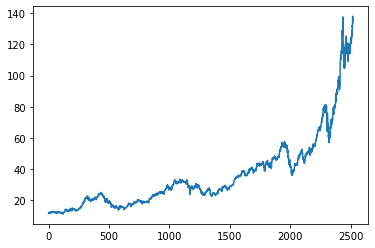

In [7]:
plt.plot(df.Open)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    118.223525
2514    118.489800
2515    118.699475
2516    118.925550
2517    119.125175
Name: Close, Length: 2518, dtype: float64

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513     99.158737
2514     99.494725
2515     99.866312
2516    100.218837
2517    100.573950
Name: Close, Length: 2518, dtype: float64

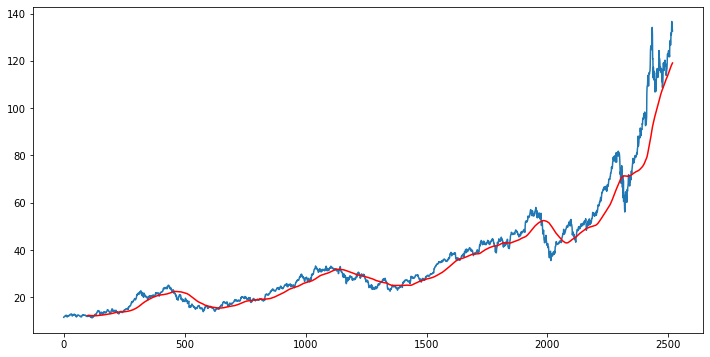

In [10]:
"""
10 Days Moving average
"""
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

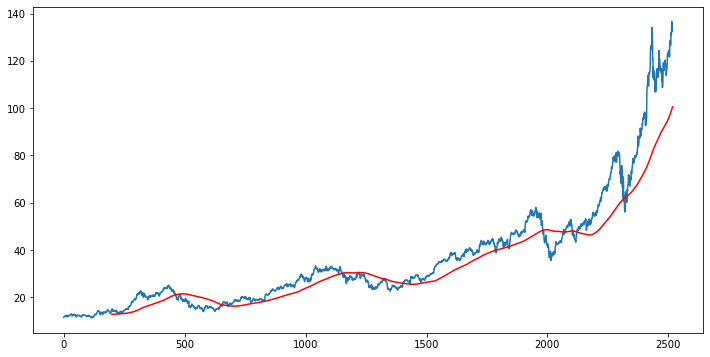

In [11]:
"""
200 Days moving average
"""
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma200, 'r')

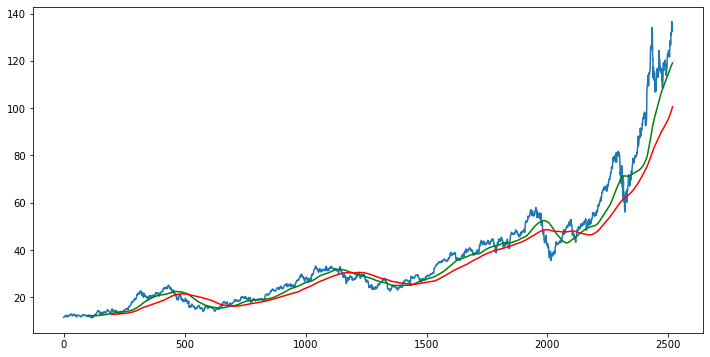

In [12]:
"""
wo ma
100 days m       a
200 Days moving average
"""
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])

In [14]:
data_testing

,Close
2014,35.547501
2015,37.064999
2016,36.982498
2017,37.687500
2018,38.327499
...,...
2513,131.970001
2514,136.690002
2515,134.869995
2516,133.720001


In [15]:
data_training

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929
...,...
2009,39.292500
2010,39.037498
2011,39.057499
2012,39.435001


In [16]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00553023],
       [0.01088475],
       [0.01219857],
       ...,
       [0.59449112],
       [0.60256499],
       [0.60352739]])

In [19]:
x_train = []

y_train = []

In [20]:
data_training_array.shape

(2014, 1)

In [21]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(1914, 100, 1)

In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=70, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units=90, activation = 'relu', return_sequences = True))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 70)           36680     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 70)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           4

In [26]:
model.compile(optimizer="adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
60/60 [==============================] - 43s 425ms/step - loss: 0.0569
Epoch 2/50
60/60 [==============================] - 25s 411ms/step - loss: 0.0208
Epoch 3/50
60/60 [==============================] - 24s 404ms/step - loss: 0.0166
Epoch 4/50
60/60 [==============================] - 25s 411ms/step - loss: 0.0137
Epoch 5/50
60/60 [==============================] - 25s 412ms/step - loss: 0.0125
Epoch 6/50
60/60 [==============================] - 24s 408ms/step - loss: 0.0113
Epoch 7/50
60/60 [==============================] - 25s 411ms/step - loss: 0.0106
Epoch 8/50
60/60 [==============================] - 26s 426ms/step - loss: 0.0100
Epoch 9/50
60/60 [==============================] - 25s 419ms/step - loss: 0.0098
Epoch 10/50
60/60 [==============================] - 25s 417ms/step - loss: 0.0092
Epoch 11/50
60/60 [==============================] - 25s 417ms/step - loss: 0.0090
Epoch 12/50
60/60 [==============================] - 25s 417ms/step - loss: 0.0087
Epoch 13/50
6

In [27]:
past100days = data_training.tail(100)
finalTesdata= past100days.append(data_testing, ignore_index = True)


In [28]:
finalTesdata

,Close
0,52.220001
1,51.882500
2,52.217499
3,52.437500
4,52.560001
...,...
599,131.970001
600,136.690002
601,134.869995
602,133.720001


In [29]:
input_data = scaler.fit_transform(finalTesdata)
input_data

array([[0.16484169],
       [0.1615048 ],
       [0.16481695],
       [0.16699211],
       [0.16820328],
       [0.17581631],
       [0.18634599],
       [0.18110587],
       [0.1800677 ],
       [0.18009244],
       [0.18118002],
       [0.1828361 ],
       [0.18723583],
       [0.19158611],
       [0.19969348],
       [0.2047606 ],
       [0.21118719],
       [0.21299156],
       [0.20930863],
       [0.19999012],
       [0.19554094],
       [0.18819981],
       [0.20184394],
       [0.19497245],
       [0.20817164],
       [0.2018192 ],
       [0.18708753],
       [0.18797736],
       [0.18829867],
       [0.1924018 ],
       [0.18654374],
       [0.19428032],
       [0.19774081],
       [0.19336578],
       [0.20456285],
       [0.20651556],
       [0.21027261],
       [0.21526558],
       [0.22216181],
       [0.21207702],
       [0.20293148],
       [0.20164619],
       [0.20930863],
       [0.18333044],
       [0.17860937],
       [0.19754306],
       [0.1858022 ],
       [0.197

In [30]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[[i, 0]])
    


In [31]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(504, 100, 1)
(504, 2, 1)


In [32]:
ypred= model.predict(x_test)

In [41]:
ypred[0]

array([28.27513], dtype=float32)

In [38]:
scaler.scale_[0]

0.009887040382591772

In [51]:
y_test.shape

(504, 2, 1)

In [50]:
ypred.shape

(504, 100, 1)

In [35]:
scale_factor = 1/scaler.scale_[0]
ypred = ypred * scale_factor
y_test = y_test * scale_factor

In [48]:
list(ypred)

[array([[28.27513 ],
        [23.069424],
        [21.840626],
        [22.288237],
        [23.44951 ],
        [24.874432],
        [26.263784],
        [27.480335],
        [28.484104],
        [29.273752],
        [29.839005],
        [30.214163],
        [30.443586],
        [30.544676],
        [30.572037],
        [30.574308],
        [30.588373],
        [30.636406],
        [30.72395 ],
        [30.837425],
        [30.957767],
        [31.066256],
        [31.166172],
        [31.259663],
        [31.359915],
        [31.469183],
        [31.57397 ],
        [31.664854],
        [31.740498],
        [31.807129],
        [31.86715 ],
        [31.928547],
        [31.999449],
        [32.079926],
        [32.17293 ],
        [32.2801  ],
        [32.40179 ],
        [32.537533],
        [32.68711 ],
        [32.84238 ],
        [32.99247 ],
        [33.128613],
        [33.249634],
        [33.341576],
        [33.389725],
        [33.408154],
        [33.409348],
        [33.4

ValueError: x and y can be no greater than 2D, but have shapes (504,) and (504, 2, 1)

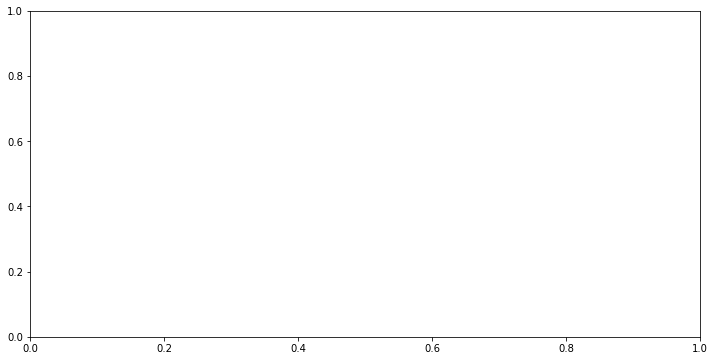

In [49]:
plt.figure(figsize=(12,6))
plt.plot(list(y_test), 'b', label= 'Actual')
plt.plot(list(ypred), 'r', label = 'Pred Price')
plt.show()

In [88]:
def model_builder(hp):
    model = Sequential()
    x = hp.Int("units",min_value=50, max_value=100, step=10)
    model.add(LSTM(units=x, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))

    ## Here mchine chose best no. of size of hidden layers
    x = hp.Int("units",min_value=32,max_value=256,step=32)
    model.add(Dense(units=x))
    
    ## Here mchine chose the probablity of droping the layers
    y = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
    model.add(Dropout(rate=y))
    model.add(Dense(1,activation="relu"))
    model.compile(optimizer="adam",metrics="mean_squared_error")
    return model

In [89]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                    objective="mean_squared_error",
                    max_epochs=10,
                    directory="Kt_sdnn",
                    project_name="keras_tuner")

In [90]:
tuner.search(x_train, y_train,epochs=50, validation_split=0.2)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units             |70                |?                 
rate              |0.6               |?                 
tuner/epochs      |2                 |?                 
tuner/initial_e...|0                 |?                 
tuner/bracket     |2                 |?                 
tuner/round       |0                 |?                 

Epoch 1/2


ValueError: in user code:

    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:799 train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:530 minimize
        return self.apply_gradients(grads_and_vars, name=name)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:630 apply_gradients
        grads_and_vars = optimizer_utils.filter_empty_gradients(grads_and_vars)
    C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\optimizer_v2\utils.py:75 filter_empty_gradients
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['lstm/lstm_cell/kernel:0', 'lstm/lstm_cell/recurrent_kernel:0', 'lstm/lstm_cell/bias:0', 'dense/kernel:0', 'dense/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0'].


In [ ]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

In [ ]:
tuner.get_best_hyperparameters()[0].get("rate")